**Single linear regression**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # To visualize the data



In [ ]:
# Data 
hours = [2.5,5.1,3.2,8.5,3.5,1.5, 9.2, 5.5,8.3,2.7,7.7, 5.9, 4.5, 3.3, 1.1, 8.9]
scores = [21, 47, 27, 75, 50, 20, 88, 99, 81, 37, 85, 62, 41, 42,A 17, 95]

df = pd.DataFrame({"Hr":hours, "Scores":scores })

df.describe()

,Hr,Scores
count,16.000000,16.000000
mean,5.087500,55.437500
std,2.730781,28.324239
min,1.100000,17.000000
25%,3.075000,34.500000
50%,4.800000,48.500000
75%,7.850000,82.000000
max,9.200000,99.000000


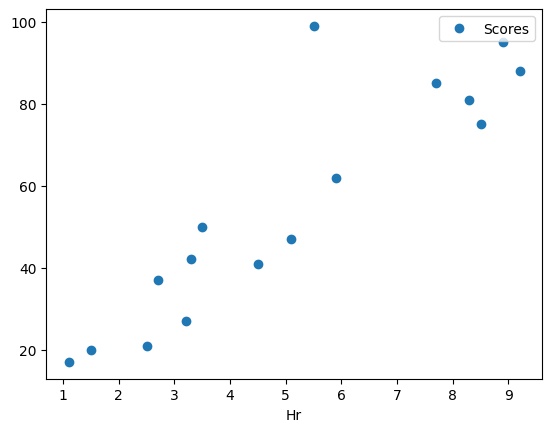

In [65]:
df.plot( x = "Hr", y = "Scores", style = "o") # x, y given inside the plot function need to small letters
plt.show()

In [66]:
#Extracting the Inputs(X) and outputs(Y) for the ML model 
X = df.iloc[: ,:-1].values # .values - converts dataframes(column) into numpy array # (-1) select all the columns except the last column
Y = df.iloc[:, 1].values    # X - Independent variable and Y - dependent variable


In [67]:
from sklearn.linear_model import LinearRegression # LinearRegression - is a class
reg = LinearRegression()  # reg  is and object under LinearRegression
reg.fit(X, Y) # fit - is a method - to get the linear model 
print(reg.intercept_)

8.027657957669327


In [68]:
print(reg.coef_)

[9.31888787]


In [69]:
Y_pred = reg.predict(X)

In [70]:
df1 = pd.DataFrame({'Actual': Y, 'Predicted' : Y_pred})
df1.head

<bound method NDFrame.head of     Actual  Predicted
0       21  31.324878
1       47  55.553986
2       27  37.848099
3       75  87.238205
4       50  40.643766
5       20  22.005990
6       88  93.761426
7       99  59.281541
8       81  85.374427
9       37  33.188655
10      85  79.783095
11      62  63.009096
12      41  49.962653
13      42  38.779988
14      17  18.278435
15      95  90.965760>

In [71]:
from sklearn.metrics import mean_squared_error, r2_score # Importing the utility
print('MSE : %.2f' %mean_squared_error(Y,Y_pred))
print('R2_Score : %.2f' %r2_score(Y,Y_pred))

MSE : 145.00
R2_Score : 0.81


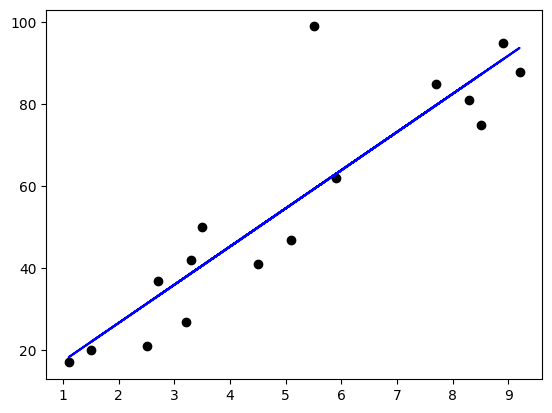

In [72]:
plt.scatter(X, Y, color = "black") # Scatter plot

plt.plot(X,Y_pred, color = "blue") # Linear line plot

**Multiple linear regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # To visualize the data
%matplotlib inline

In [77]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# x = dataset.iloc[:, :-1,-2] # All columns except for last column which is y
# y = dataset.iloc[:, 4]

# State feature is a string hence cannot be utilised for plotting the linear regression hence dropped
#Below code does the same work as the above code 
x = dataset.drop(["Profit","State"],axis = 1) # axis = 0 for rows ans axis = 1 is for columns - here features from the column is taken off
y = dataset["Profit"]
print(x,y)

    R&D Spend  Administration  Marketing Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441.51       101145.55        407934.54
3   144372.41       118671.85        383199.62
4   142107.34        91391.77        366168.42
5   131876.90        99814.71        362861.36
6   134615.46       147198.87        127716.82
7   130298.13       145530.06        323876.68
8   120542.52       148718.95        311613.29
9   123334.88       108679.17        304981.62
10  101913.08       110594.11        229160.95
11  100671.96        91790.61        249744.55
12   93863.75       127320.38        249839.44
13   91992.39       135495.07        252664.93
14  119943.24       156547.42        256512.92
15  114523.61       122616.84        261776.23
16   78013.11       121597.55        264346.06
17   94657.16       145077.58        282574.31
18   91749.16       114175.79        294919.57
19   86419.70       153514.11             0.00
20   76253.86

In [104]:
from sklearn .model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 ) # 0.2 of the total is taken for testing

In [101]:
from sklearn.linear_model import LinearRegression # LinearRegression - is a class
regressor = LinearRegression()  # reg  is and object under LinearRegression
regressor.fit(x_train, y_train) # fit - is a method - to get the linear model 

LinearRegression()

In [102]:
#Y intercept and weight of each feature
print(regressor.intercept_) # To get the y intercept
print(regressor.coef_) # Gives the weight of each input feature

50298.33394871476
[ 0.78094615 -0.03356776  0.03819329]


In [ ]:
# Making predictions for test data which is not used for training
y_pred = regressor.predict(x_test)

In [107]:
dataset =  pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
dataset

,Actual,Predicted
44,65200.33,63503.654926
11,144259.40,135375.073530
26,105733.54,109407.615415
27,105008.31,115807.610639
14,132602.65,148509.670488
12,141585.52,128869.197426
43,69758.98,59488.702041
21,111313.02,117802.411331
13,134307.35,127241.274742
17,125370.37,130142.990762


In [109]:
from sklearn.metrics import mean_squared_error, r2_score # Importing the utility
print(regressor.coef_) # Printing the weights 
print('MSE : %.2f' %mean_squared_error(y_test,y_pred)) # Mean square error
print('R2_Score : %.2f' %r2_score(y_test,y_pred)) # R2 score

[ 0.78094615 -0.03356776  0.03819329]
MSE : 84696998.59
R2_Score : 0.88


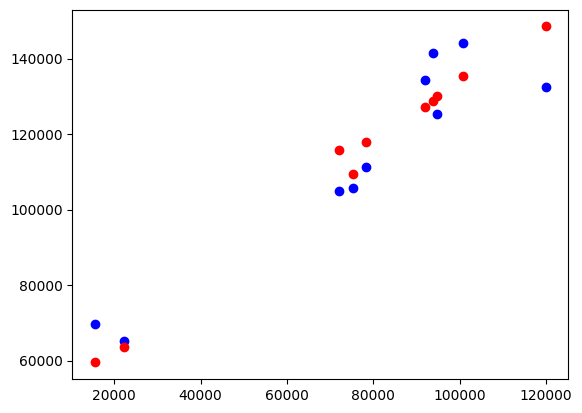

In [ ]:
# Plotting x_test vs y_test , x_test vs y_pred - for R&D spend
plt.scatter(x_test['R&D Spend'], y_test, color = 'blue')
plt.scatter(x_test['R&D Spend'], y_pred, color = 'red')

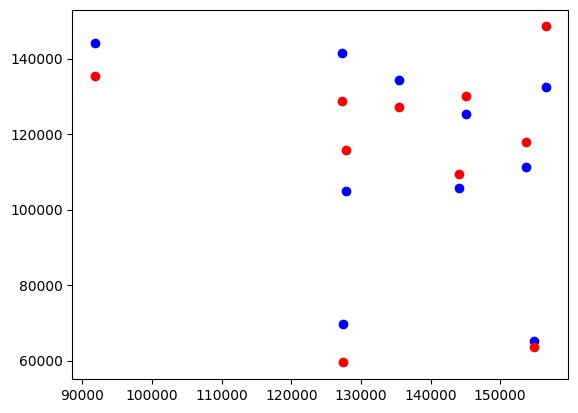

In [ ]:
# Plotting x_test vs y_test , x_test vs y_pred - for Administration
plt.scatter(x_test['Administration'], y_test, color = 'blue')
plt.scatter(x_test['Administration'], y_pred, color = 'red')

**Polynomial regression**


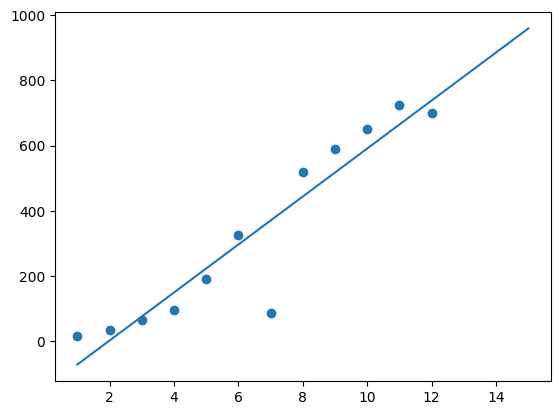

MSE : 9462.97
R2_Score : 0.87


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import r2_score, mean_squared_error
D = [1,2,3,4,5,6,7,8,9,10,11,12] # No. of days
W = [16.08, 33.83, 65.8, 97.2, 191.55, 326.20, 87, 520.53, 590.03, 651.92, 724.93, 699.5] #Weight of the onion bulb

mymodel =  np. poly1d(np.polyfit(D,W, 1)) # 3 is degree of fitting - polynomial of degree 3 
myline = np.linspace(1,15,100) # Equally spaced line between 1 to 15 and  100 e

plt.scatter(D,W)
plt.plot(myline, mymodel(myline))

plt.show()

print('MSE : %.2f' %mean_squared_error(W, mymodel(D))) # Mean square error
print('R2_Score : %.2f' %r2_score(W, mymodel(D))) # R2 score
